# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Luca Salimon Nascimento</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.stats as stats

In [40]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [41]:
df.iloc[0:5]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [42]:
df['hemisfério'] = ""
hemisferio = []
for i in range(len(df)):
    if df.Latitude[i] < 0:
        hemisferio.append("sul")
    if df.Latitude[i] >0:
        hemisferio.append('norte')
df['hemisfério'] = pd.Series(hemisferio)
pd.DataFrame(df.hemisfério)

,hemisfério
0,norte
1,norte
2,sul
3,sul
4,norte
5,sul
6,norte
7,sul
8,sul
9,sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

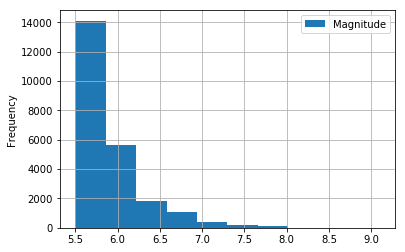

In [43]:
mag = df.Magnitude.plot(kind = 'hist', legend = True)
mag.grid(True)

A maior parte dos terremotos são terremotos com a magnitude entre 5.5 e 6.0,com menos de 8.5% dos terremotos tendo magnitude maior que 6.2

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [44]:
fit = expon.fit(df.Magnitude)

mu = fit[0]
sigma = fit[1]
print(mu)
print(sigma)

5.49999999967
0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

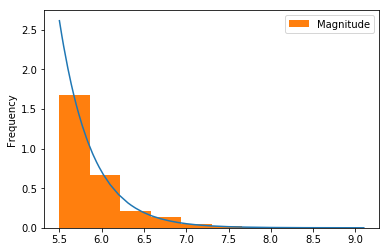

In [45]:
plt.plot(sorted(df['Magnitude']), stats.expon.pdf(sorted(df['Magnitude']), loc=mu, scale = sigma))
df.Magnitude.plot(kind = 'hist', legend = True, normed = True)
plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [46]:
tab = pd.crosstab(df.hemisfério, df.Type, normalize = True)
tab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
hemisfério,,,,
norte,0.449062,0.000128,0.004271,0.000043
sul,0.543249,0.000043,0.003204,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [47]:
terremoto_norte = len(df.loc[(df['hemisfério'] == 'norte')&(df['Type'] == 'Earthquake')])
terremoto_total = len(df.loc[df['Type'] == 'Earthquake'])
prob_terremoto_norte = terremoto_norte/terremoto_total
prob_terremoto_norte

0.4525223829201102

Explique o seu raciocínio

A probabilidade de ocorrer um terremoto no hemisfério norte é o número de terremotos que ocorrem no norte dividido pelo número total de terremotos, que dá uma probabilidade de aproximadamente 54.25%. 

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [48]:
soma = []
for i in range(4):
    soma.append(tab.iloc[0,i])
total_norte = np.sum(soma)
prob_nuclear_n = tab.iloc[0,2]/total_norte
print(prob_nuclear_n)

0.00941885655081


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [49]:
r = df.groupby('hemisfério').size().div(len(df))
df.groupby(['Type', 'hemisfério']).size().div(len(df)).div(r,axis=0,level='hemisfério')

Type               hemisfério
Earthquake         norte         0.990204
                   sul           0.994060
Explosion          norte         0.000283
                   sul           0.000078
Nuclear Explosion  norte         0.009419
                   sul           0.005862
Rock Burst         norte         0.000094
dtype: float64

Dado que foi no norte, a probabiliade de ter sido Nuclear explosion é de 0.009419.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

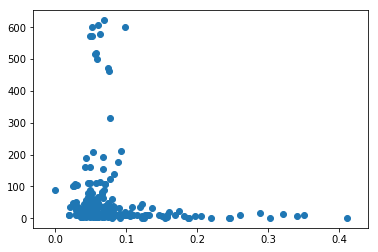

In [50]:
scatter = plt.scatter(df['Magnitude Error'], df['Depth'])
plt.show(scatter)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [51]:
corr = df['Magnitude Error'].corr(df["Depth"])
print('a correlaçao entre as variaveis é de {0}'.format(corr))

a correlaçao entre as variaveis é de -0.0769184389233872


Explique o que significa o valor da correlação calculada acima? 

Quase não há correlação entre as duas variáveis, dado que o valor é aproximadamente 0.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

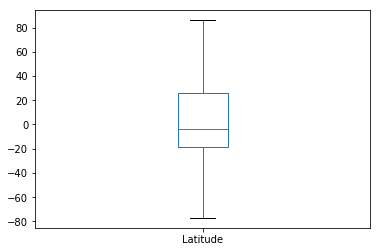

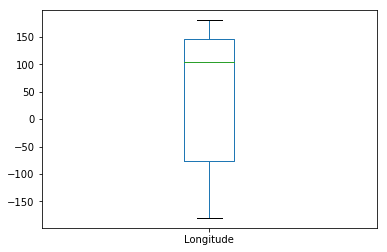

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


In [52]:
lat = df.Latitude.plot(kind = 'box')
plt.show()
long = df.Longitude.plot(kind = 'box')
plt.show()
lat_d = df.Latitude.describe()
long_d = df.Longitude.describe()
print(lat_d) 
print()
print(long_d)

No quesito de abalos sísmicos:
A média  da latidude é 1.68°, enquanto a latitude mínima é de -77° e máxima de 86°.
A média da longitude é 39°, enquanto a longitude mínima é de -179° e máxima de 179°.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [53]:
sul = df[df.hemisfério == "sul"]
tabela_sul = pd.crosstab(sul["Type"],sul['Magnitude Type'], normalize = True)
tabela_sul

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,,,,
Earthquake,0.152650,0.000234,0.000078,0.002189,0.074175,0.316711,0.106222,0.252228,0.001251,0.088323
Explosion,0.000078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nuclear Explosion,0.005706,0.000000,0.000000,0.000156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
norte = df[df.hemisfério == 'norte']
tabela_norte = pd.crosstab(norte['Type'],norte['Magnitude Type'], normalize = True)
tabela_norte

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,,,,
Earthquake,0.154513,0.000283,0.000377,0.003486,0.070944,0.34577,0.103542,0.229979,0.000942,0.080366
Explosion,0.000283,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Nuclear Explosion,0.008479,0.000000,0.000000,0.000942,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Rock Burst,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000094,0.000000,0.000000


In [55]:
#P(MB&NE|sul)
prob_sul = tabela_sul.iat[2,0]
prob_sul

#P(MB&NE|Norte)
prob_norte = tabela_norte.iat[2,0]
prob_norte

print('Probabilidade de ocorrer abalos do tipo MB e Nuclear explosion no norte: {0}\nProbabilidade de ocorrer abalos do tipo MB e Nuclear explosion no sul: {1}'.format(prob_norte, prob_sul))

Probabilidade de ocorrer abalos do tipo MB e Nuclear explosion no norte: 0.008479366873940079
Probabilidade de ocorrer abalos do tipo MB e Nuclear explosion no sul: 0.005705799593559481


Como a probabilidade de ocorrer no norte é maior, é mais provável que tenha ocorrido no norte.